# Louvain Algorithm for clustering recipes based on user input

This notebook is dependent on the output of the notebook titled "Adjacency Matrix 2.0" and is designed to run after that one.

In [1]:
## NOTE: THESE ARE THE MODULES I NEEDED TO INSTALL OR UPGRADE FOR THIS CODE

# %pip install louvain
# %pip install community
# %pip install python-louvain
# %pip install --upgrade networkx
# %pip install --upgrade scipy

In [2]:
## setup
import time
import pickle
import os
import random
import networkx as nx
import community as community_louvain
import pandas as pd
import numpy as np

random.seed(101)

In [3]:
## import the matrix pickle files
with open(os.getcwd()+'/offline/edges.pickle', 'rb') as handle:
    edges_pickle = pickle.load(handle)
# with open(os.getcwd()+'/offline/weights.pickle', 'rb') as handle:
#     weights_pickle = pickle.load(handle)

In [57]:
## get input from user of ingredients
user_ing = input('Enter desired ingredients: ')
remove = input('Recipe cannot include: ')
## parse string from user
ui = user_ing.split(' ')#.apply(lambda x: [re.sub('[,™()®;\*:.!?\'0-9#\/]','',n.strip().lower()) for n in x]).tolist()
bad_list = remove.split(' ')
print('inclusions:',ui,' vs. exclusions:',bad_list)
## match ui to indicies of edges aka nodes
# edges_matching_ui = [k for k, v in edges_pickle.items() if v in ui] # simple version
edges_matching_ui = []

for n in range(len(ui)):
    match_one = [k for k, v in edges_pickle.items() if v == ui[0] and v not in bad_list]
    if len(ui) < 2:
        edges_matching_ui = match_one
    else:
        match_more = [k for k, v in edges_pickle.items() if v == ui[n] and v not in bad_list]
        new_matches = (list(set(match_one).intersection(match_more)))
        edges_matching_ui.extend(new_matches)

## remove recipes with bad ingredients



Enter desired ingredients: strawberry sugar
Recipe cannot include: flour wheat
inclusions: ['strawberry', 'sugar']  vs. exclusions: ['flour', 'wheat']


### Louvain without weights

In [58]:
## time the execution
start_time = time.time()

## edges = edges_pickle
G = nx.Graph()
G.add_edges_from(edges_matching_ui)

## return partition type = dict
partition = community_louvain.best_partition(G)

## get the clusters with the most results and drop those with no results
cluster_ranks = {}
cluster_names = list(partition.values())
for v in cluster_names:
    cluster_ranks[v] = cluster_names.count(v)

## sort the clusters by how many recipes they each include
cluster_ranks_sorted = pd.DataFrame(cluster_ranks,index=[0]).transpose().sort_values(0,ascending=False)
cluster_ranks_sorted.rename({0:'count'},axis=1,inplace=True)

## pick the top ten clusters with the most recipes
top_ten_clusters = cluster_ranks_sorted[:10].index.values.tolist()

## pick a random node from each of the top ten clusters and return as recommendations set
recommendations = []
for n in top_ten_clusters:
    matching_recipes = [k for k,v in partition.items() if v == n]
    recommendations.append(random.choice(matching_recipes))
    
## results
print('List of recommended recipe ids:\n',recommendations)
print('\nThis notebook took',round(time.time() - start_time,2),'seconds to run after the user input was entered.')

List of recommended recipe ids:
 ['183644', '63285223', '257687', '274976', '63107027', '62912555', '50146', '27684966', '223431', '220153']

This notebook took 0.12 seconds to run after the user input was entered.


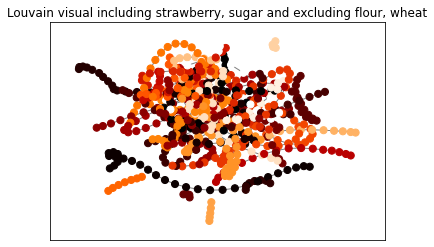

In [62]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# # visualization -- note that this takes a LONG TIME to run
# pos = nx.spring_layout(G)
# cmap = cm.get_cmap('gist_heat', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50,cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.title('Louvain visual including '+', '.join(ui)+' and excluding '+', '.join(bad_list))
# plt.show()